# The Sparks Foundation

# GRIP: Data Science and Business Analytics Intern - July 2021

## Sbmitted by: Joshua Miranda

## Task 1: Prediction using Decision Tree Algorithm

<img src="task1-TSF.png">

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Import the inbuilt data set from sklearn

### We combine the features and the target to create the dataframe on which we build the Decision Tree

In [2]:
d =datasets.load_iris()
print("features of the dataset are:", d.feature_names)
print("the targets are: ",d.target_names)

features of the dataset are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
the targets are:  ['setosa' 'versicolor' 'virginica']


In [3]:
# we add all the feature columns to the dataframe

df = pd.DataFrame(d.data, columns = d.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# adding the target column to the dataframe and then viewing the final dataframe with both feautres and target

df['Target'] = pd.DataFrame(d.target)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# looking at the dataypes of all the columns in the final dataset and looking for any null or missing values 
# we see that we have no missing or null values

print(df.info())
print("")
print("-----------------")
print("")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None

-----------------

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64


In [6]:
# check for correlations among the feature columns
# as a rule, if two columns have a correlation of >= 0.90, then we drop one of them
# we use Pearson's correlation here

corr = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## Now that we have our final dataset, we move on to seperating the features and target columns

In [7]:
# seperating the features and targets
# The feature columns go in X and the target column goes in y

X = df.drop("Target",axis=1)
y = df['Target']

In [8]:
# creating the train and test sets using train_test_split, here we use the 80-20 split 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [9]:
# the scale of the values in the different feature columns is different. 
#This may cause an issue in the final model building as features with a higher scale will be given more importance.
# To solve this, we will scale all the feature data values using the Standard Scaler method.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## With the data split into train and test sets and also scaled, we can now create the Decision Tree model

[Text(279.0, 498.3, 'X[3] <= -0.559\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(236.07692307692307, 407.70000000000005, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(321.9230769230769, 407.70000000000005, 'X[3] <= 0.671\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(171.69230769230768, 317.1, 'X[2] <= 0.638\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(85.84615384615384, 226.5, 'X[3] <= 0.542\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(42.92307692307692, 135.89999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(128.76923076923077, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(257.53846153846155, 226.5, 'X[3] <= 0.412\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(214.61538461538458, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(300.46153846153845, 135.89999999999998, 'X[0] <= 1.262\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(257.53846153846

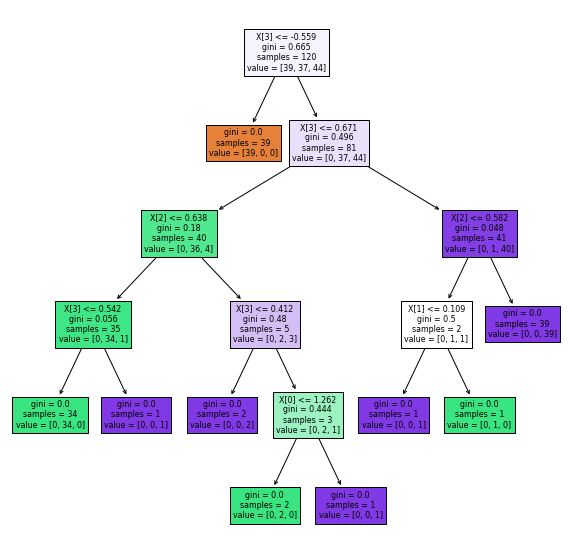

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


clf = DecisionTreeClassifier()

# we train the classifier on the training data
model=clf.fit(X_train,y_train)

# to visualize the tree in the text format, we use the export_text() method
text_visual = tree.export_text(clf)
print(text_visual)


# to view the tree as a diagram, we use the plot_tree() method
fig = plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True)

## Evaluating the Decision Tree model

In [12]:
# we predict the classes of the test data, this will be compared with y_test to evaluate the models performance

y_predicted = clf.predict(X_test)

---------- Confusion Matrix ----------


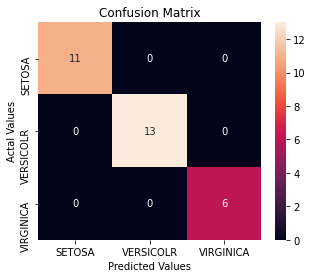

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import seaborn as sns

print("---------- Confusion Matrix ----------")

# we first get the confusion matrix and convert it to a dataframe for better presentaion purposes
# the dataframe is then potted out using the seaborn library

cm = confusion_matrix(y_test,y_predicted)
cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLR','VIRGINICA'], columns = ['SETOSA','VERSICOLR','VIRGINICA'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [16]:
# we see an accuracy of 100 % after evaluation, which is great!!

print("---------- Accuracy Score ----------")
print("")
print("accuracy: ",accuracy_score(y_test, y_predicted) * 100,"%")

---------- Accuracy Score ----------

accuracy:  100.0 %


In [17]:
# the classification report also shows good values for accuracy, precision and recall for all three classes

print("---------- Classification Report ----------")
print("")
print(classification_report(y_test, y_predicted, target_names=['setosa', 'versicolor', 'virginica']))

---------- Classification Report ----------

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## feedind the model a new tuple of data and getting an output class

In [76]:
# as our dataset has four features, we create four input variables

sepal_length = 5.0
sepal_width = 3.2
petal_length = 1.50
petal_width = 0.2

In [77]:
# the data has to be fed into the created model as an array
test_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

# since we scaled the data before training the model on the train data, we also have to scale this input data
test_data_scaled = sc.transform(test_data)

# we get the predicted class of the inputs fed to the model
class_index = clf.predict(test_data_scaled)[0]
print("class index is: ",class_index)

# a simple if-else condition gives us the final class that the model has predicted
if class_index == 0:
    print("input belongs to class Setosa")
elif class_index == 1:
    print("input belongs to class Virginica")
elif class_index == 2:
    print("input belongs to class Versicolor")

class index is:  0
input belongs to class Setosa
